## Import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read raw data from file

In [2]:
weather_df = None
weather_df = pd.read_csv('../data/internal/weather.csv')

In [3]:
weather_df.head()

,Country,Name,Weather,Temp,Humidity,Visibility,Wind speed,Clouds
0,JP,Tokyo,Clear,280.24,58,10000,3.60,0
1,ID,Pecenongan,Haze,299.25,86,6000,2.06,20
2,IN,New Delhi,Mist,292.25,88,1000,0.00,0
3,CN,Guangzhou,Clouds,288.07,47,10000,4.62,24
4,IN,Konkan Division,Mist,300.15,83,2200,4.12,20


## Question #1

- How does humidity affect the weather?
- Meaning: Understanding the relationship between humidity and weather conditions can help predict and cope with specific weather conditions
- Answering:
     + Identify the Relationship: Utilize a boxplot to illustrate the distribution of humidity based on different weather conditions, aiding in recognizing variability and correlations
     + Analyzing Impact: Observe the differences between the boxes to assess the diversity of humidity across various weather types
     + Visual Representation: Employ a boxplot to depict the extent of humidity variation and make comparisons between different weather conditions.
     + Recognize Trends: Based on the graph, identify trends or notable points related to humidity under specific weather conditions.

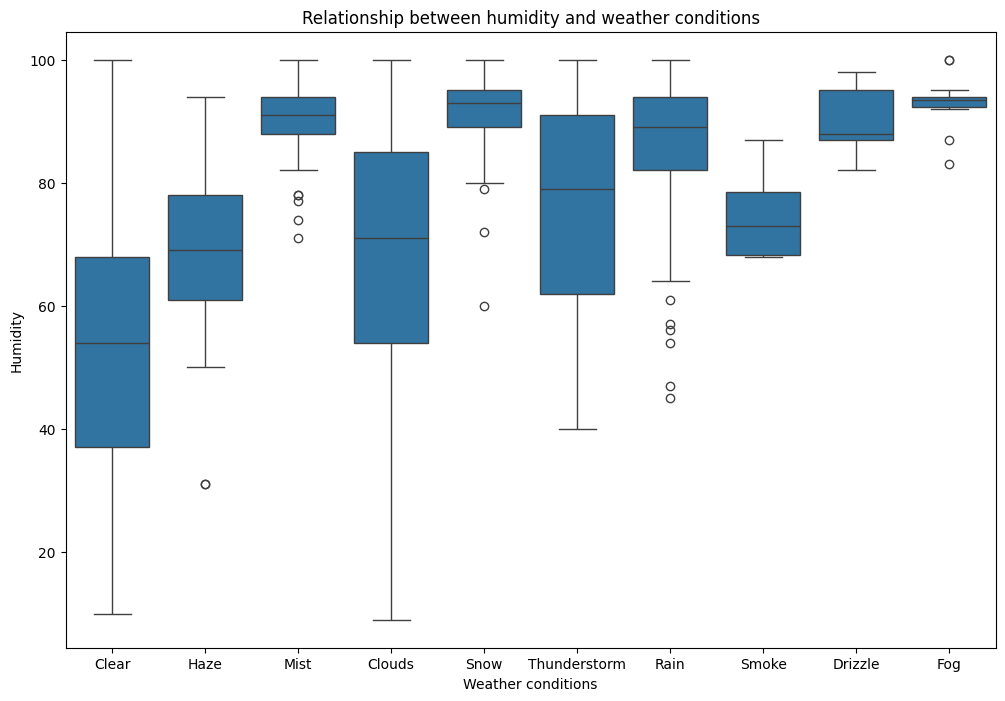

In [4]:
# visualize
plt.figure(figsize=(12, 8))
sns.boxplot(x='Weather', y='Humidity', data=weather_df)
plt.title('Relationship between humidity and weather conditions')
plt.xlabel('Weather conditions')
plt.ylabel('Humidity')
plt.show()

## Question #2

- How is the weather characterized in each country?
- Meaning: Understanding the weather characteristics of each country helps us comprehend climate variations, providing crucial information for weather forecasting and implementing appropriate response measures.
- Answer:
    + Weather Classification by Country: Utilizing line charts to illustrate the frequency of each weather type in each country, aiding in recognizing trends and distinctive features of each region.
    + Correlation Between Weather and Geography: Assessing the correlation between weather types and the geography of each country, such as whether tropical countries exhibit different weather patterns compared to polar regions.
    + Representation of Weather Variability: Using line charts to depict the variability of weather in each country, facilitating the identification of changes and stability in climate over time.
    + Extreme Weather Conditions: This may involve determining the frequency of extreme weather conditions such as storms, heavy snowfall, or tropical conditions.

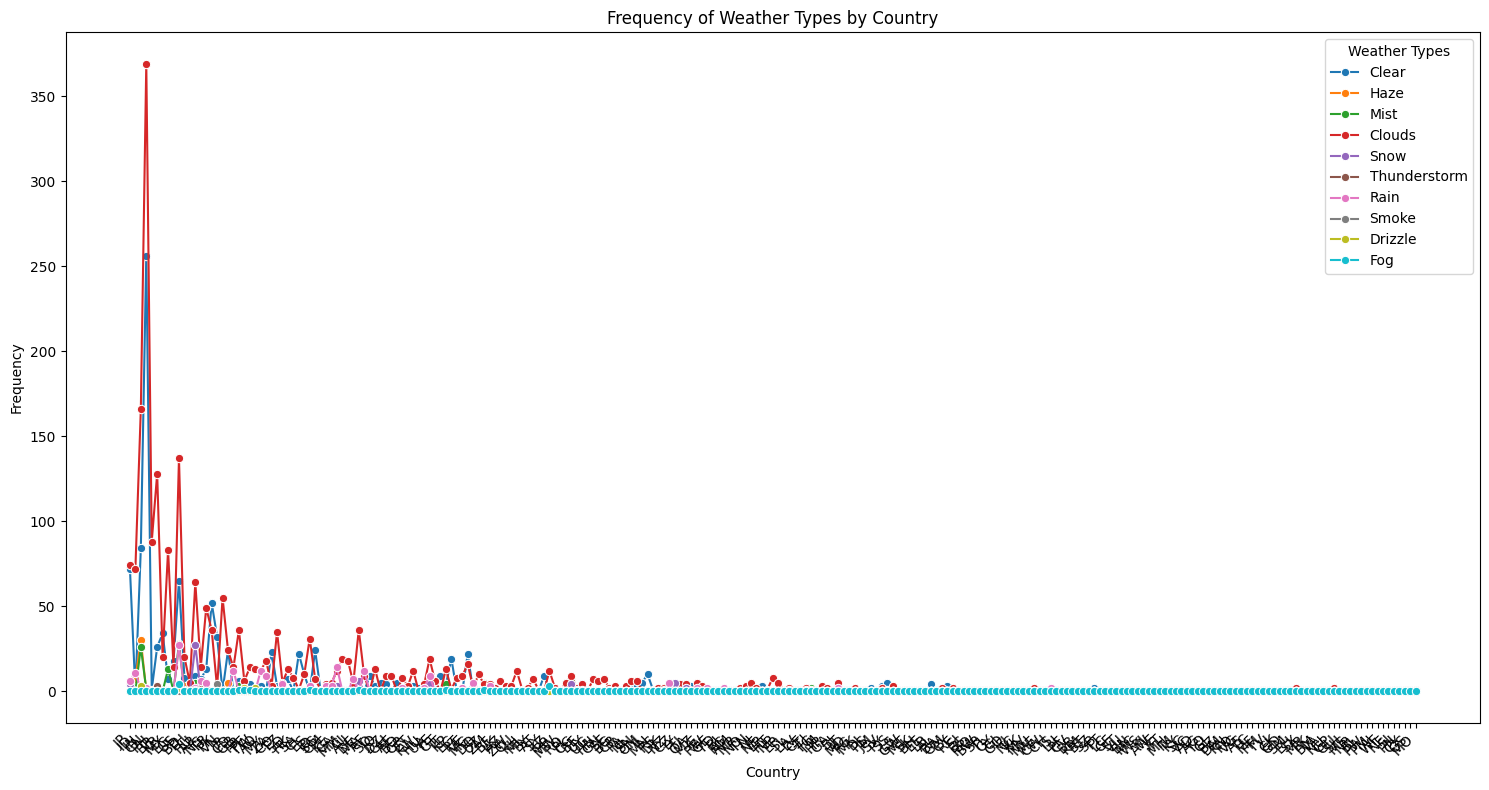

In [5]:
# Lấy ra các giá trị unique của cột 'Country' và 'Weather'
unique_countries = weather_df['Country'].unique()
unique_weathers = weather_df['Weather'].unique()

# Tạo DataFrame mới với các giá trị unique
data = {'Country': [], 'Weather': [], 'Frequency': []}

# Lặp qua từng quốc gia và thời tiết để lấy số lần xuất hiện
for country in unique_countries:
    for weather in unique_weathers:
        count = len(weather_df[(weather_df['Country'] == country) & (weather_df['Weather'] == weather)])
        data['Country'].append(country)
        data['Weather'].append(weather)
        data['Frequency'].append(count)

# Tạo DataFrame từ dữ liệu
df = pd.DataFrame(data)

# Thiết lập kích thước biểu đồ
plt.figure(figsize=(15, 8))

# Vẽ biểu đồ đường
sns.lineplot(x='Country', y='Frequency', hue='Weather', data=df, marker='o')

# Thiết lập các thông số cho biểu đồ
plt.title('Frequency of Weather Types by Country')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Xoay tên quốc gia để dễ đọc

# Hiển thị chú thích
plt.legend(title='Weather Types', bbox_to_anchor=(1, 1))

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

/tmp/ipykernel_375/3146220726.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=average_values, ci=None)


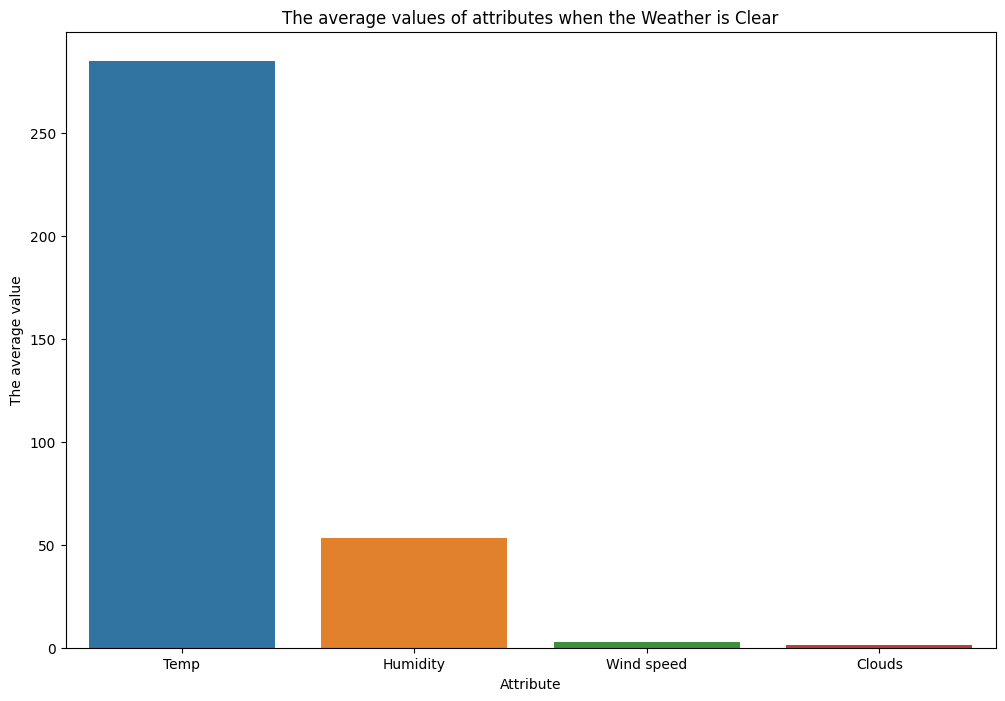

In [6]:
# Lọc dữ liệu để chỉ chọn các hàng có Weather là 'Clear'
clear_weather_data = weather_df[weather_df['Weather'] == 'Clear']

# Nhóm dữ liệu theo cột 'Weather' và tính giá trị trung bình
average_values = clear_weather_data.groupby('Weather')[['Temp', 'Humidity', 'Wind speed', 'Clouds']].mean()

# Biểu đồ cột dạng bar
plt.figure(figsize=(12, 8))
sns.barplot(data=average_values, ci=None)
plt.title('The average values of attributes when the Weather is Clear')
plt.xlabel('Attribute')
plt.ylabel('The average value')
plt.show()

## Question #3

- How are the values of the columns Temp, Humidity, Wind speed, and Clouds distributed when Weather is Clear?
- Meaning:
    + Weather Forecasting: Understanding the variability of temperature, humidity, wind speed, and cloudiness in Clear conditions helps improve weather forecasting.
    + Climate Preparedness: Having insights into the changes in essential weather factors during clear weather can assist in preparing for outdoor activities or events.
- Answering: Use a violin plot to visualize the distribution of Temp, Humidity, Wind speed, and Clouds when the weather is Clear. Each plot will showcase the variation of each attribute, aiding in identifying important characteristics and differences in clear weather conditions.

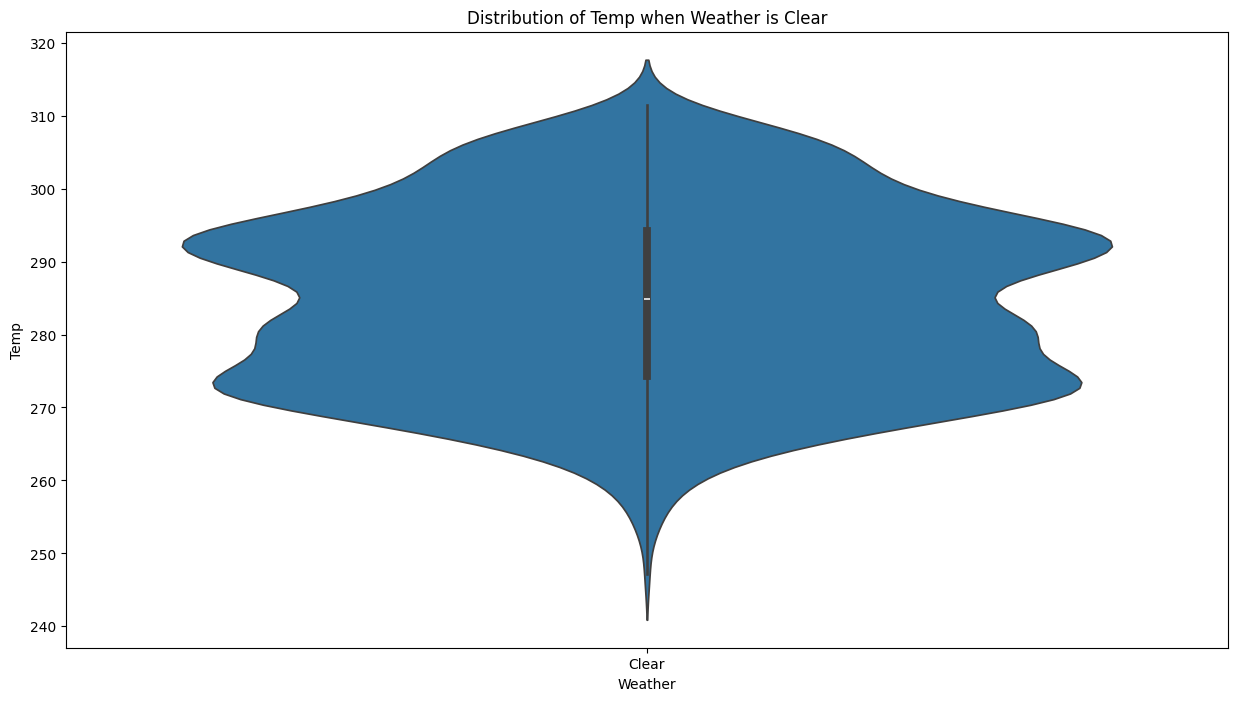

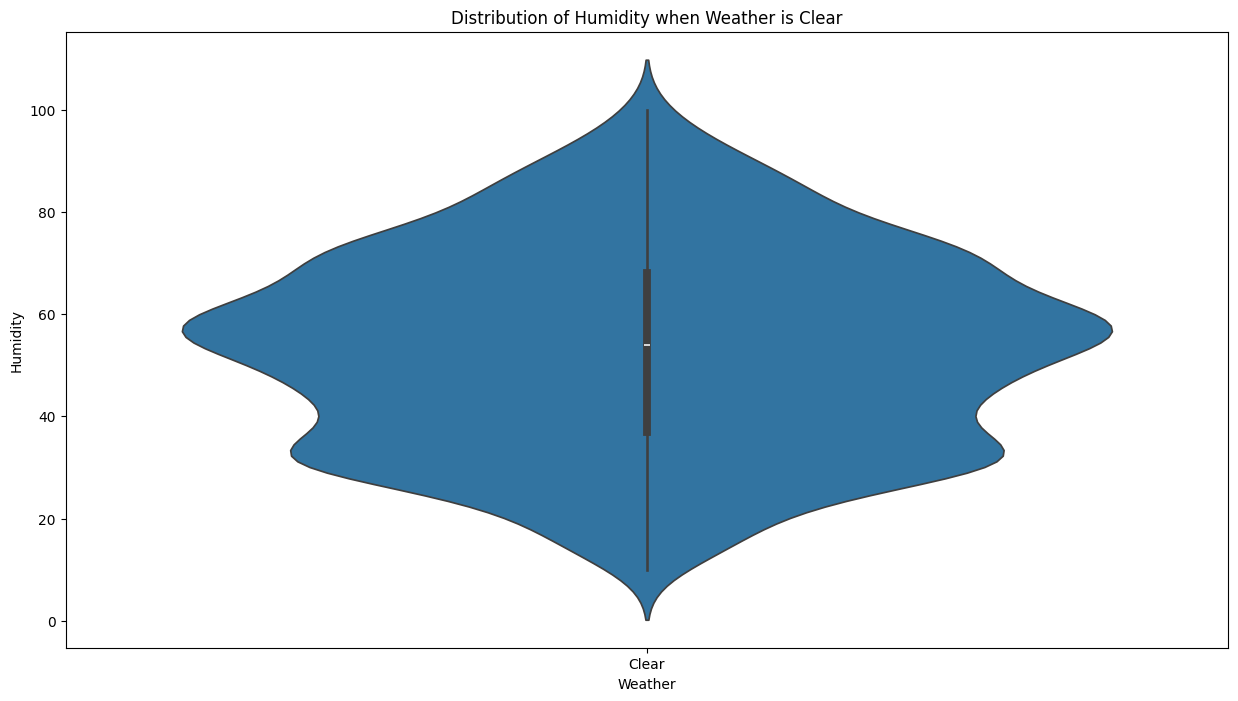

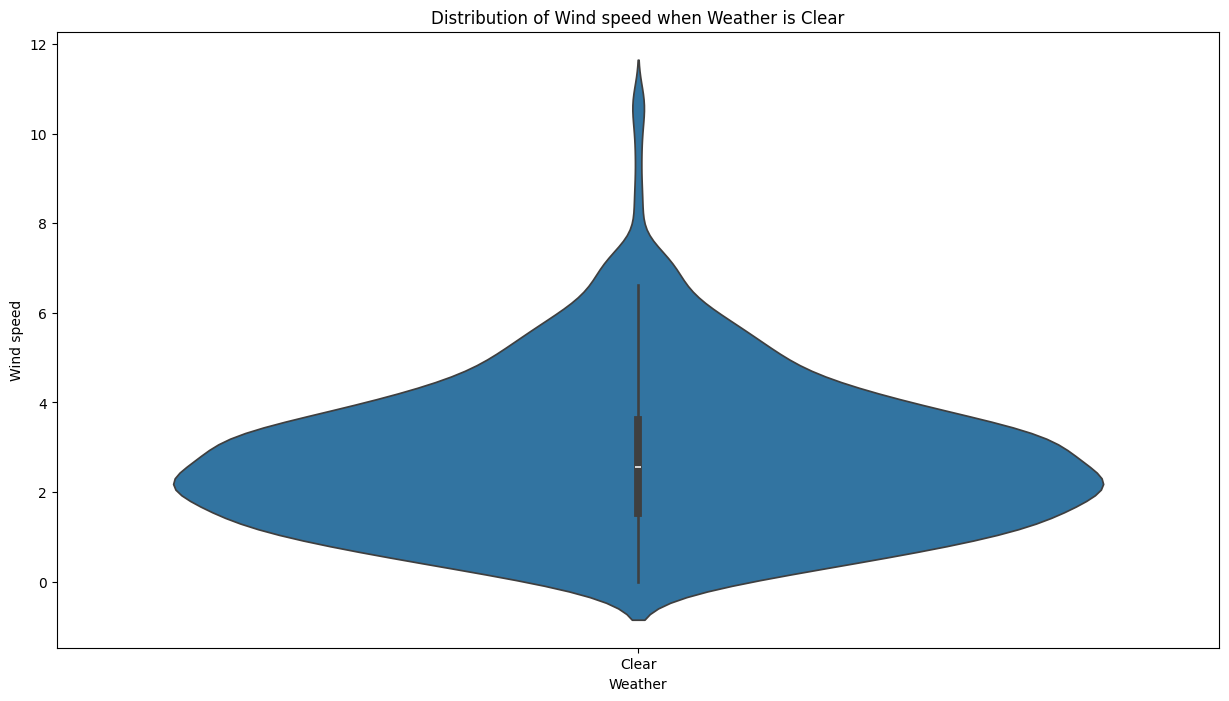

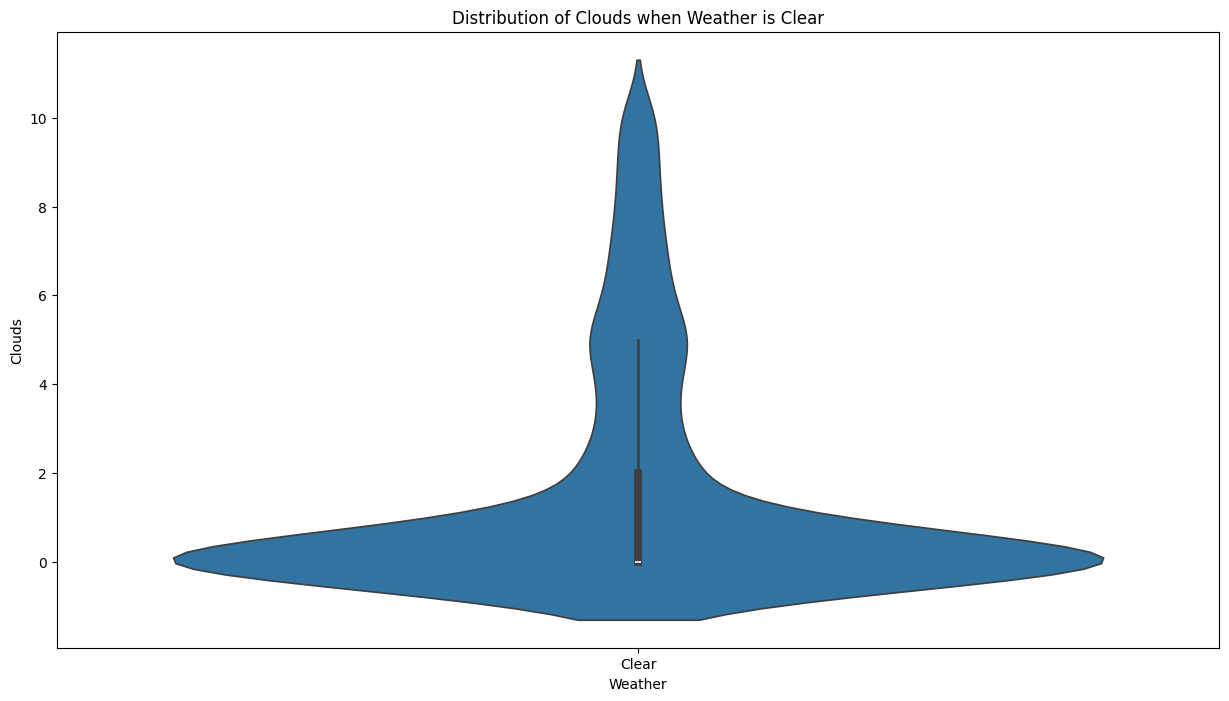

In [7]:
# Lọc dữ liệu khi Weather là Clear
clear_weather_data = weather_df[weather_df['Weather'] == 'Clear']

# Vẽ violin plot cho các thuộc tính khi Weather là Clear
plt.figure(figsize=(15, 8))
sns.violinplot(x='Weather', y='Temp', data=clear_weather_data)
plt.title('Distribution of Temp when Weather is Clear')
plt.xlabel('Weather')
plt.ylabel('Temp')
plt.show()

plt.figure(figsize=(15, 8))
sns.violinplot(x='Weather', y='Humidity', data=clear_weather_data)
plt.title('Distribution of Humidity when Weather is Clear')
plt.xlabel('Weather')
plt.ylabel('Humidity')
plt.show()

plt.figure(figsize=(15, 8))
sns.violinplot(x='Weather', y='Wind speed', data=clear_weather_data)
plt.title('Distribution of Wind speed when Weather is Clear')
plt.xlabel('Weather')
plt.ylabel('Wind speed')
plt.show()

plt.figure(figsize=(15, 8))
sns.violinplot(x='Weather', y='Clouds', data=clear_weather_data)
plt.title('Distribution of Clouds when Weather is Clear')
plt.xlabel('Weather')
plt.ylabel('Clouds')
plt.show()